### Import libraries.

In [155]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

### Read the dataset into a dataframe object.
#### Using the pickled data from earlier, which preserved the time series indexing.

In [156]:
df = pickle.load(open("../datasets/occupancy.p", "rb"))
# df = pickle.load(open("../datasets/train.p", "rb"))
# df = pickle.load(open("../datasets/test.p", "rb"))
# df = pickle.load(open("../datasets/test2.p", "rb"))

### Peek at the data.

In [157]:
df.head()

,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday
date,,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,1
2015-02-04 17:52:00,23.15,27.2675,429.5,714.00,0.004783,1,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,1


### Data dictionary.

|Feature Name|Feature Description|Units of Measurement|
|---|---|---|
|date|time the observation was recorded|year-month-day hour:minute:second|
|temperature|temperature recorded|Celsius|
|humidity|relative humidity recorded|%|
|light|light recorded at time of observation|Lux|
|co2|CO2 measured at the time of observation|ppm, parts per million|
|humidity_ration|derived quantity from temperature and relative humidity|kgwater-vapor/kg-air|
|occupancy|status of room occupancy|0 for not occupied, 1 for occupied status|
|weekday|indicates if the timestamp is weekday or weekend| 1 for weekday, 0 for weekend|

### Generate descriptive statistics and visualize.

In [158]:
describe = df.describe()
describe.drop('count', inplace=True)
describe

,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday
mean,20.827630,27.998747,121.453183,686.479722,0.004258,0.211120,0.678122
std,1.036616,5.169896,202.207255,313.669585,0.000784,0.408115,0.467209
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,0.000000
25%,20.100000,24.890000,0.000000,458.750000,0.003767,0.000000,0.000000
50%,20.625000,27.793333,0.000000,564.000000,0.004343,0.000000,1.000000
75%,21.500000,31.856667,217.916667,792.000000,0.004860,0.000000,1.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.006476,1.000000,1.000000


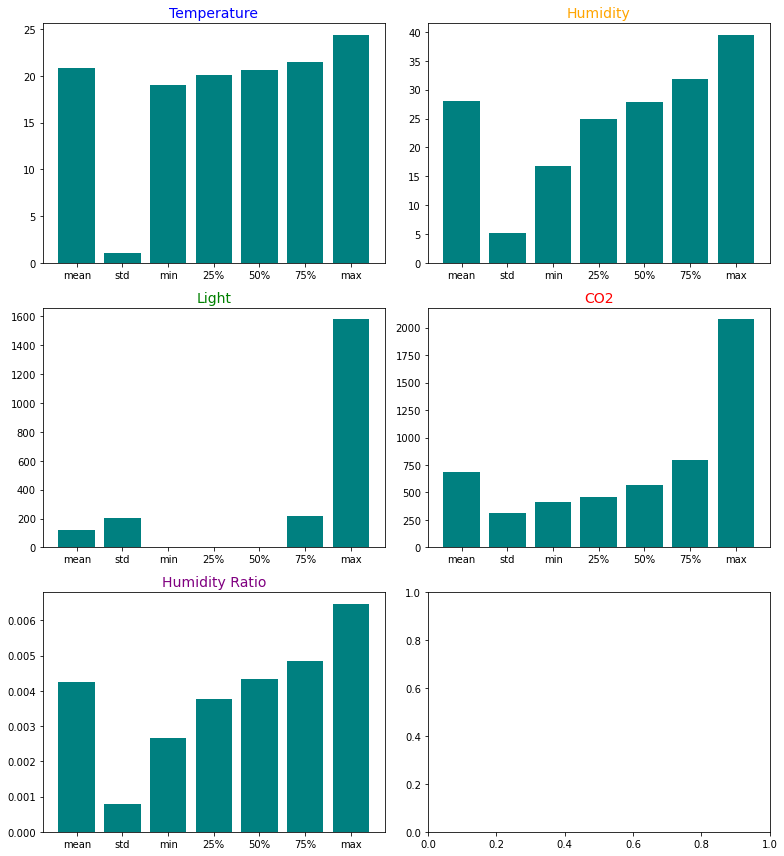

In [159]:
x = describe.index
y = describe.columns
colors = ['blue', 'orange', 'green', 'red', 'purple']
titles = ['Temperature', 'Humidity', 'Light', 'CO2', 'Humidity Ratio']

f, a = plt.subplots(3,2)
a = a.ravel()

f.set_figheight(12)
f.set_figwidth(11)

for idx, ax in enumerate(a):
    if idx < 5:
        ax.bar(x, describe[y[idx]], color='teal')    
        ax.set_title(titles[idx], fontsize=14, color=colors[idx])
    
plt.tight_layout()
f.savefig('../images/fig1.jpg', dpi=200)

plt.show()

### Check occupancy value counts.

In [160]:
classes = df['occupancy'].value_counts(normalize=True)
classes

0    0.78888
1    0.21112
Name: occupancy, dtype: float64

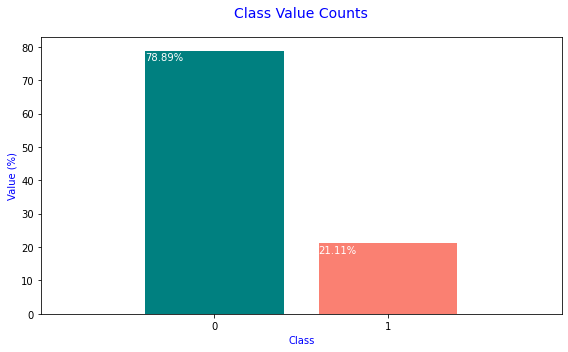

In [161]:
x = classes.index
y = [np.round(val*100, 2) for val in classes.values]

plt.figure(figsize=(8,5))
bars = plt.bar(x, y, color=['teal', 'salmon'])
plt.title('Class Value Counts', fontsize=14, color='blue', pad=20)
plt.xlabel('Class', color='blue')
plt.xticks(rotation=0, ticks=[0, 1])
plt.xlim(-1, 2)
plt.ylabel('Value (%)', color='blue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval-3, str(yval)+'%', color='white')
plt.tight_layout()
plt.savefig('../images/fig2.jpg', dpi=200)
plt.show()

### Histograms of each attribute.

In [162]:
df.columns

Index(['temperature', 'humidity', 'light', 'co2', 'humidity_ratio',
       'occupancy', 'weekday'],
      dtype='object')

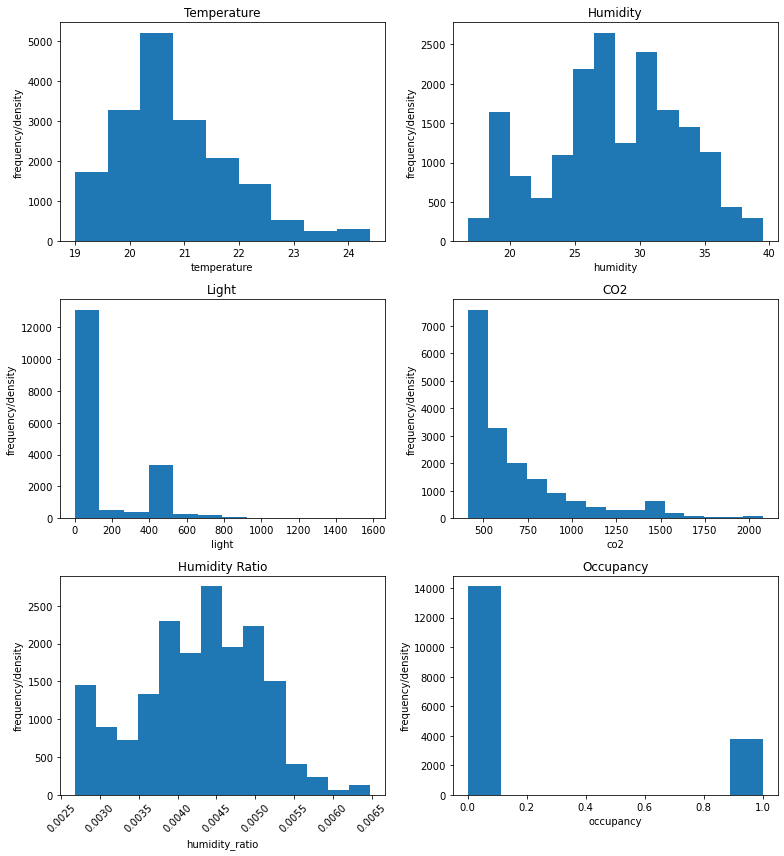

In [163]:
xaxes = ['temperature', 'humidity', 'light', 'co2', 'humidity_ratio', 'occupancy']
titles = ['Temperature', 'Humidity', 'Light', 'CO2', 'Humidity Ratio', 'Occupancy']
bins = [9, 14, 12, 15, 14, 9]
f, a = plt.subplots(3,2, squeeze=False)
a = a.ravel()
f.set_figheight(12)
f.set_figwidth(11)
for idx, ax in enumerate(a):
    if idx == 4:
        ax.xaxis.set_visible(True)
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
    ax.hist(df[xaxes[idx]], bins=bins[idx])
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel('frequency/density')
plt.tight_layout()
f.savefig('../images/fig3.jpg', dpi=200)
plt.show()

Temperature: right-skewed (positive skewness)    
CO2: right-skewed (positive skewness)    
Humidity_ratio: right-skewed (positive skewness)

### Line plot for each attribute over time observed.

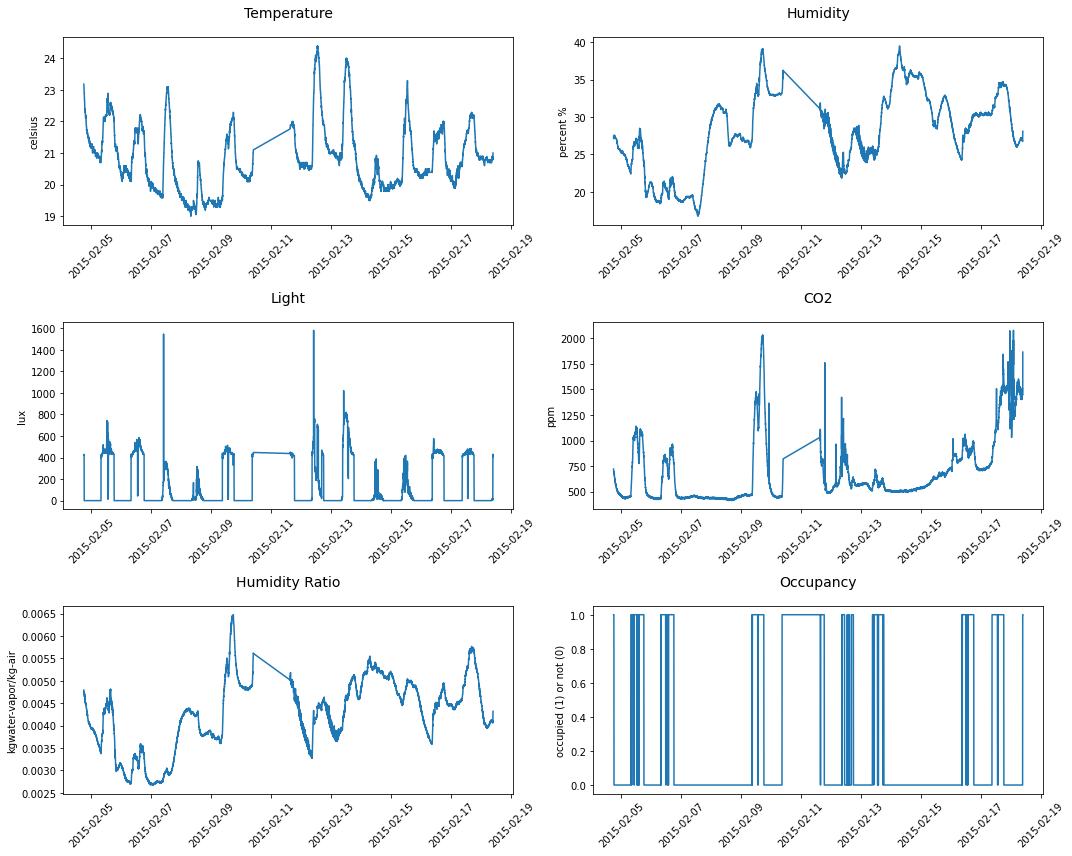

In [164]:
xaxes = ['temperature', 'humidity', 'light', 'co2', 'humidity_ratio', 'occupancy']
yaxes = ['celsius', 'percent %', 'lux', 'ppm', 'kgwater-vapor/kg-air', 'occupied (1) or not (0)']
titles = ['Temperature', 'Humidity', 'Light', 'CO2', 'Humidity Ratio', 'Occupancy']

f, a = plt.subplots(3,2, squeeze=False)
a = a.ravel()
f.set_figheight(12)
f.set_figwidth(15)

for idx, ax in enumerate(a):
    ax.xaxis.set_visible(True)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.plot(df.index, df[xaxes[idx]])
    ax.set_title(titles[idx], fontsize=14, pad=20, loc='center')
    ax.set_ylabel(yaxes[idx])
    
plt.tight_layout()
f.savefig('../images/fig4.jpg', dpi=200)    

plt.show()

### Closer look at how the variables behave during a work day - i.e. Thursday, compared to a weekend day - i.e. Saturday.

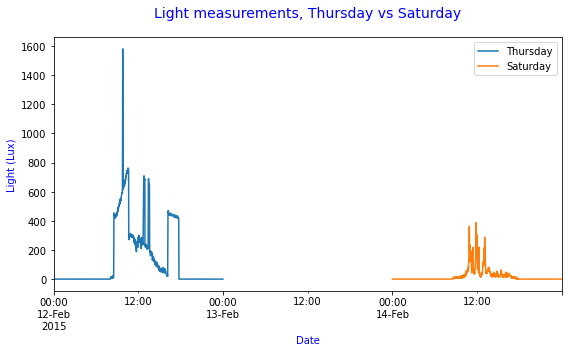

In [199]:
plt.figure(figsize=(8,5))
df['2015-02-12']['light'].plot()
df['2015-02-14']['light'].plot()
plt.title('Light measurements, Thursday vs Saturday', fontsize=14, color='blue', pad=20)
plt.xlabel('Date', color='blue')
plt.ylabel('Light (Lux)', color='blue')
plt.legend(['Thursday', 'Saturday'])
plt.tight_layout()
plt.savefig('../images/fig5.jpg', dpi=200)
plt.show()

Light values measured on Thursday are higher than Saturday light measurements.

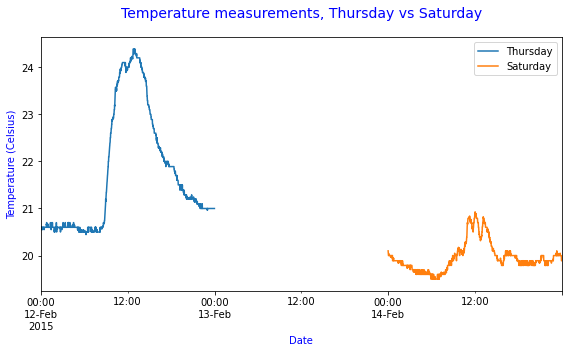

In [200]:
plt.figure(figsize=(8,5))
df['2015-02-12']['temperature'].plot();
df['2015-02-14']['temperature'].plot();
plt.title('Temperature measurements, Thursday vs Saturday', fontsize=14, color='blue', pad=20)
plt.xlabel('Date', color='blue')
plt.ylabel('Temperature (Celsius)', color='blue')
plt.legend(['Thursday', 'Saturday'])
plt.tight_layout()
plt.savefig('../images/fig6.jpg', dpi=200)
plt.show()

Temperature values are higher for occupancy and lower for non-occupancy, i.e. weekday vs weekend day.

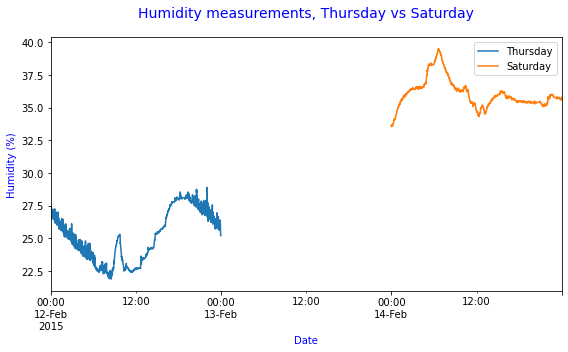

In [201]:
plt.figure(figsize=(8,5))
df['2015-02-12']['humidity'].plot();
df['2015-02-14']['humidity'].plot();
plt.title('Humidity measurements, Thursday vs Saturday', fontsize=14, color='blue', pad=20)
plt.xlabel('Date', color='blue')
plt.ylabel('Humidity (%)', color='blue')
plt.legend(['Thursday', 'Saturday'])
plt.tight_layout()
plt.savefig('../images/fig7.jpg', dpi=200)
plt.show()

When the room is occupied, we see humidity measuring at lower values than when the room is empty.

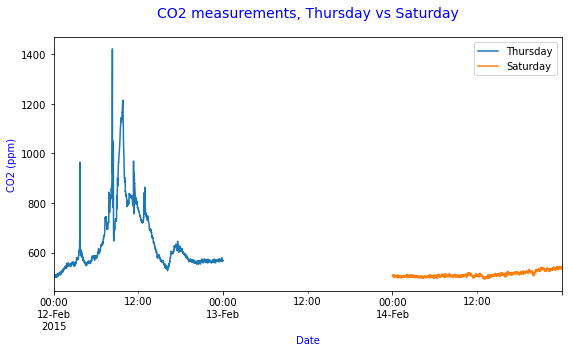

In [202]:
plt.figure(figsize=(8,5))
df['2015-02-12']['co2'].plot();
df['2015-02-14']['co2'].plot();
plt.title('CO2 measurements, Thursday vs Saturday', fontsize=14, color='blue', pad=20)
plt.xlabel('Date', color='blue')
plt.ylabel('CO2 (ppm)', color='blue')
plt.legend(['Thursday', 'Saturday'])
plt.tight_layout()
plt.savefig('../images/fig8.jpg', dpi=200)
plt.show()

CO2 values are higher on Thursday than on Saturday.

### Compare average values by class.

In [169]:
occupancy_mean = df.groupby('occupancy').mean()
occupancy_mean

,temperature,humidity,light,co2,humidity_ratio,weekday
occupancy,,,,,,
0,20.548926,27.925799,26.185953,611.878361,0.004170,0.591981
1,21.869046,28.271327,477.431873,965.237637,0.004588,1.000000


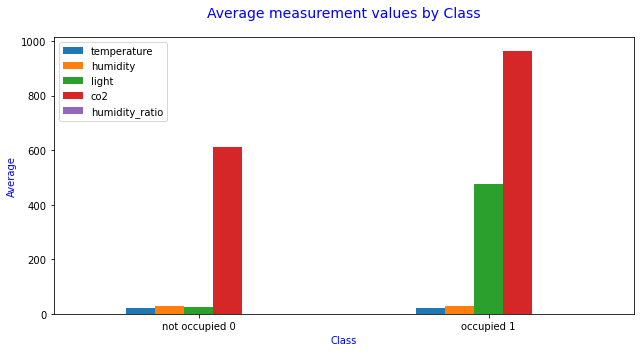

In [203]:
occupancy_mean.drop(columns=['weekday']).plot(kind='bar', figsize=(9,5))
plt.title('Average measurement values by Class', fontsize=14, pad=20, color='blue')
plt.xlabel('Class', color='blue')
plt.xticks(rotation=0, ticks=[0, 1], labels=['not occupied 0', 'occupied 1'])
plt.ylabel('Average', color='blue')
plt.legend(loc=0)
plt.tight_layout()
plt.savefig('../images/fig9.jpg', dpi=200)
plt.show()

Average Light and Average CO2 are significantly higher when the room is occupied.  
Average Temperature is slightly higher when the room is occupied.  
Average Humidity is slightly higher when the room is occupied.  
Average Humidity Ratio is slightly higher when the room is occupied.  

### 2/12 Thur and 2/7 Sat are showing a spike in the light measurement. Let's zoom in...

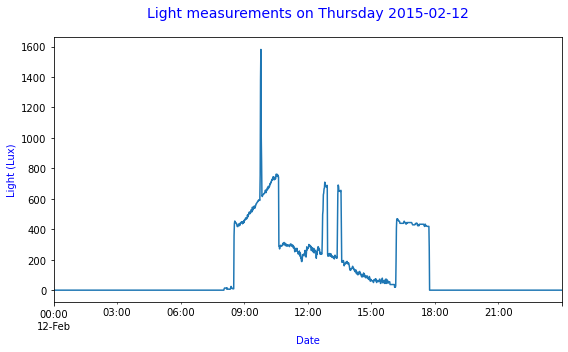

In [171]:
plt.figure(figsize=(8,5))
df['2015-02-12']['light'].plot()
plt.title('Light measurements on Thursday 2015-02-12', fontsize=14, color='blue', pad=20)
plt.xlabel('Date', color='blue')
plt.ylabel('Light (Lux)', color='blue')
plt.tight_layout()
plt.savefig('../images/fig10.jpg', dpi=200)
plt.show()

In [172]:
df[df['light'] == df['2015-02-12']['light'].max()]

,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday
date,,,,,,,
2015-02-12 09:47:00,22.79,25.29,1581.0,1211.5,0.004338,1,1


In [173]:
df['2015-02-12 09:42:00':'2015-02-12 09:52:00']

,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday
date,,,,,,,
2015-02-12 09:42:00,22.675000,25.267500,592.50,1167.500000,0.004304,1,1
2015-02-12 09:43:00,22.700000,25.290000,592.50,1166.000000,0.004314,1,1
2015-02-12 09:44:00,22.700000,25.290000,589.25,1178.500000,0.004314,1,1
2015-02-12 09:45:00,22.700000,25.290000,756.00,1195.000000,0.004314,1,1
2015-02-12 09:46:00,22.772000,25.290000,1380.00,1202.500000,0.004333,1,1
2015-02-12 09:47:00,22.790000,25.290000,1581.00,1211.500000,0.004338,1,1
2015-02-12 09:48:00,22.790000,25.100000,1010.50,1215.500000,0.004305,1,1
2015-02-12 09:49:00,22.890000,24.600000,844.00,1192.000000,0.004244,1,1
2015-02-12 09:50:00,22.865000,24.647500,621.00,1139.750000,0.004246,1,1


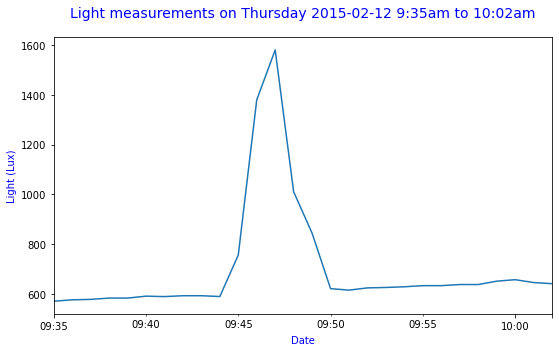

In [174]:
plt.figure(figsize=(8,5))
df['2015-02-12 09:35:00':'2015-02-12 10:02:00']['light'].plot()
plt.title('Light measurements on Thursday 2015-02-12 9:35am to 10:02am', fontsize=14, color='blue', pad=20)
plt.xlabel('Date', color='blue')
plt.ylabel('Light (Lux)', color='blue')
plt.tight_layout()
plt.savefig('../images/fig11.jpg', dpi=200)
plt.show()

It seems the lights are turned on around 9:45am, and we see a spike in the light intensity.  
Lux: The amount of light that is cast on a surface is called illuminance, which is measured in lux. This can be thought of as light intensity within a specific area.  
As natural light increases with the daylight, the lights are turned off.


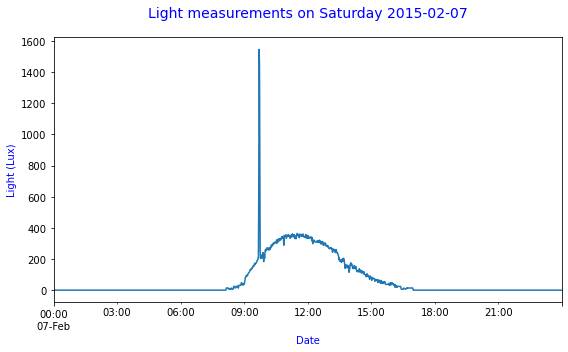

In [175]:
plt.figure(figsize=(8,5))
df['2015-02-07']['light'].plot()
plt.title('Light measurements on Saturday 2015-02-07', fontsize=14, color='blue', pad=20)
plt.xlabel('Date', color='blue')
plt.ylabel('Light (Lux)', color='blue')
plt.tight_layout()
plt.savefig('../images/fig12.jpg', dpi=200)
plt.show()

In [176]:
df[df['light'] == df['2015-02-07']['light'].max()]

,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday
date,,,,,,,
2015-02-07 09:42:00,20.7,18.89,1546.333333,455.333333,0.002845,0,0


In [177]:
df['2015-02-07 09:35:00':'2015-02-07 09:46:00']

,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday
date,,,,,,,
2015-02-07 09:35:00,20.525,19.000000,181.500000,455.000000,0.002831,0,0
2015-02-07 09:36:00,20.550,19.000000,188.500000,458.250000,0.002835,0,0
2015-02-07 09:37:00,20.600,18.972500,190.000000,457.000000,0.002840,0,0
2015-02-07 09:38:00,20.600,18.926667,196.666667,456.333333,0.002833,0,0
2015-02-07 09:39:00,20.650,18.945000,199.000000,457.500000,0.002844,0,0
2015-02-07 09:40:00,20.700,18.917500,215.000000,454.500000,0.002849,0,0
2015-02-07 09:41:00,20.700,18.890000,611.500000,452.250000,0.002845,0,0
2015-02-07 09:42:00,20.700,18.890000,1546.333333,455.333333,0.002845,0,0
2015-02-07 09:43:00,20.745,18.890000,1451.750000,453.000000,0.002853,0,0


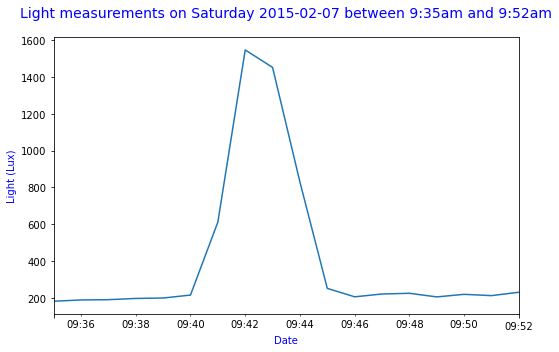

In [178]:
plt.figure(figsize=(8,5))
df['2015-02-07 09:35:00':'2015-02-07 09:52:00']['light'].plot()
plt.title('Light measurements on Saturday 2015-02-07 between 9:35am and 9:52am', fontsize=14, color='blue', pad=20)
plt.xlabel('Date', color='blue')
plt.ylabel('Light (Lux)', color='blue')
plt.tight_layout()
plt.savefig('../images/fig13.jpg', dpi=200)
plt.show()

Again, we see low light measurements up until around 9:42am, when the light intensity spikes, i.e. somebody turned on the light, and then it drops just as quickly, i.e. somebody turned the light off.  
It is a Saturday, so technically nobody should be in the office. A couple of explanations for this could be an error from the sensor, or a person turning the light on and then off.

### The descriptive stats show a max that is quite high compared to the mean CO2. Let's zoom in...

In [179]:
df[df['co2'] == df['co2'].max()]

,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday
date,,,,,,,
2015-02-18 01:51:00,20.79,27.245,0.0,2076.5,0.004134,0,1


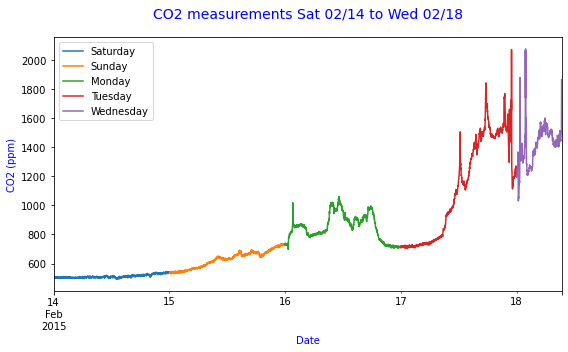

In [180]:
plt.figure(figsize=(8,5))
df['2015-02-14']['co2'].plot();
df['2015-02-15']['co2'].plot();
df['2015-02-16']['co2'].plot();
df['2015-02-17']['co2'].plot();
df['2015-02-18']['co2'].plot();
plt.title('CO2 measurements Sat 02/14 to Wed 02/18', fontsize=14, color='blue', pad=20)
plt.xlabel('Date', color='blue')
plt.ylabel('CO2 (ppm)', color='blue')
labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday']
plt.legend(labels = labels, loc=0);
plt.tight_layout()
plt.savefig('../images/fig14.jpg', dpi=200)
plt.show()

CO2 values are low on weekend days and during night.

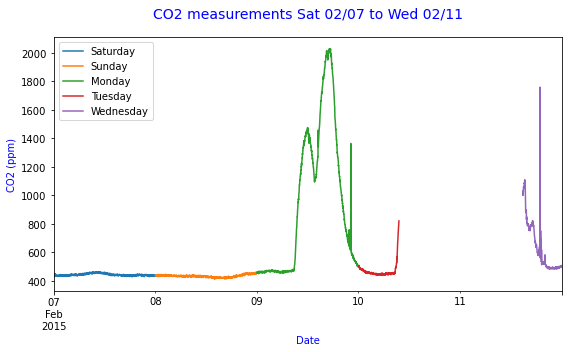

In [181]:
plt.figure(figsize=(8,5))
df['2015-02-07']['co2'].plot();
df['2015-02-08']['co2'].plot();
df['2015-02-09']['co2'].plot();
df['2015-02-10']['co2'].plot();
df['2015-02-11']['co2'].plot();
plt.title('CO2 measurements Sat 02/07 to Wed 02/11', fontsize=14, color='blue', pad=20)
plt.xlabel('Date', color='blue')
plt.ylabel('CO2 (ppm)', color='blue')
labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday']
plt.legend(labels = labels, loc=0);
plt.tight_layout()
plt.savefig('../images/fig15.jpg', dpi=200)
plt.show()

Some data is missing from the 11th - missing or not recorded.  
Weekend days record very low CO2 values - occupancy 0 likely.  
CO2 increases during weekdays - occupancy 1 likely.

### Scale data and plot the mean for each day, then compare attribute mean over time.
#### Notice the humidity and humidity_ratio are moving together - which makes sense, given humidity_ratio is calculated using humidity and temperature (see data dictionary). This tells us humidity and humidity_ratio are correlated, which may be useful to know later, for modeling.

In [182]:
ss = StandardScaler()
df_sc = pd.DataFrame(ss.fit_transform(df), df.index, df.columns)

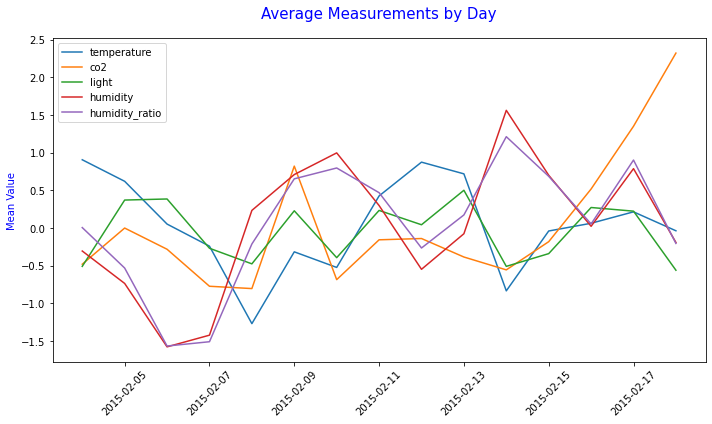

In [183]:
mean_temp_by_day = df_sc.resample('D').mean()['temperature']
mean_co2_by_day = df_sc.resample('D').mean()['co2']
mean_light_by_day = df_sc.resample('D').mean()['light']
mean_humidity_by_day = df_sc.resample('D').mean()['humidity']
mean_humidity_ratio_by_day = df_sc.resample('D').mean()['humidity_ratio']
dates = df_sc.resample('D').mean().index

plt.figure(figsize=(10,6))
plt.plot(dates, mean_temp_by_day, label='temperature')
plt.plot(dates, mean_co2_by_day, label='co2')
plt.plot(dates, mean_light_by_day, label='light')
plt.plot(dates, mean_humidity_by_day, label='humidity')
plt.plot(dates, mean_humidity_ratio_by_day, label='humidity_ratio')
plt.title('Average Measurements by Day', fontsize=15, pad=20, color='blue')
plt.xticks(rotation=45)
plt.ylabel('Mean Value', color='blue')
plt.legend(loc=0)
plt.tight_layout()
plt.savefig('../images/fig16.jpg', dpi=200)
plt.show()

### Which day has the highest number of observations marked "occupied"?

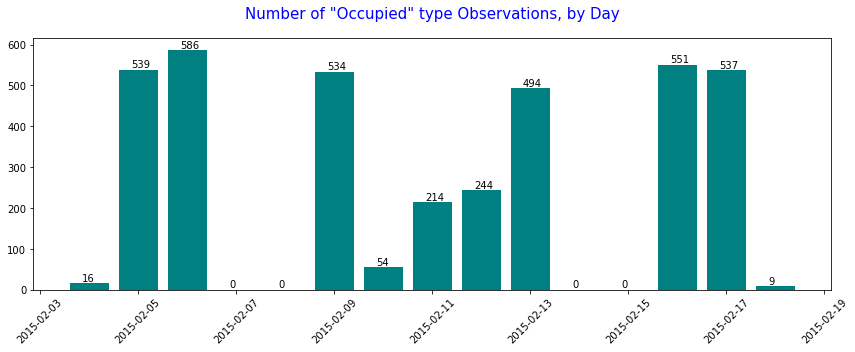

In [184]:
occupancy_by_day = df['occupancy'].resample('D').sum()
dates = df['occupancy'].resample('D').sum().index

plt.figure(figsize=(12,5))
bars = plt.bar(dates, occupancy_by_day, color='teal')

plt.title('Number of "Occupied" type Observations, by Day', fontsize=15, pad=20, color='blue')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+.25, yval+5, yval)
    
plt.tight_layout()
plt.savefig('../images/fig17.jpg', dpi=200)
plt.show()

2015-02-06 has the highest number of observations marked "occupied".  
2015-02-07 and 2015-02-08 are weekend days (Sat/Sun), hence occupancy count 0 makes sense.  
2015-02-14 and 2015-02-15 are also weekend days, occupancy count 0.  

### Are we observing the same number of recorded observations for each day?

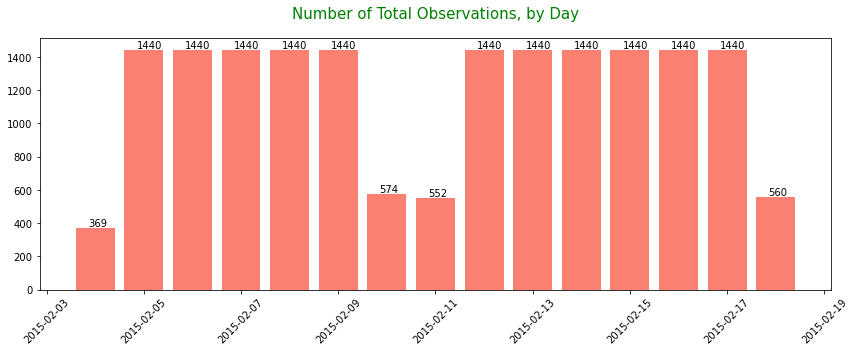

In [185]:
observations_by_day = df['occupancy'].resample('D').count()
dates = df['occupancy'].resample('D').sum().index

plt.figure(figsize=(12,5))
bars = plt.bar(dates, observations_by_day, color='salmon')

plt.title('Number of Total Observations, by Day', fontsize=15, pad=20, color='green')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+.25, yval+10, yval)

plt.tight_layout()
plt.savefig('../images/fig18.jpg', dpi=200)
plt.show()

4, 10, 11, and 18 are days with significantly less number of observations.

### Scale data and plot the rolling (60) mean for each day, then compare attribute mean over time.
##### I chose 60 because observations are recorded every minute, so a rolling 60 would give us the mean for the previous hour.
##### Again, humidity and humidity_ratio are moving together.

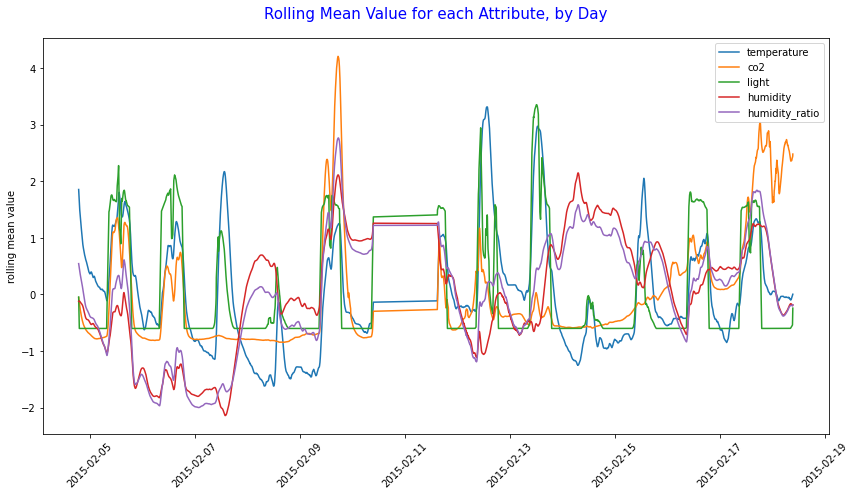

In [192]:
temp_roll_mean = df_sc.rolling(60).mean()['temperature']
co2_roll_mean = df_sc.rolling(60).mean()['co2']
light_roll_mean = df_sc.rolling(60).mean()['light']
humidity_roll_mean = df_sc.rolling(60).mean()['humidity']
humidity_ratio = df_sc.rolling(60).mean()['humidity_ratio']
dates = df_sc.index

plt.figure(figsize=(12,7))
plt.plot(dates, temp_roll_mean, label='temperature')
plt.plot(dates, co2_roll_mean, label='co2')
plt.plot(dates, light_roll_mean, label='light')
plt.plot(dates, humidity_roll_mean, label='humidity')
plt.plot(dates, humidity_ratio, label='humidity_ratio')
plt.title('Rolling Mean Value for each Attribute, by Day', fontsize=15, pad=20, color='blue')
plt.xticks(rotation=45)
plt.ylabel('rolling mean value')
plt.legend(loc=0)
plt.tight_layout()
plt.savefig('../images/fig19.jpg', dpi=200)
plt.show()

### Do we observe any significant correlation between attributes/features and the occupancy class?
##### There is a high positive correlation between occupancy and temperature, light, co2.
##### This information will be useful later, in modeling, when choosing best features to predict occupancy.

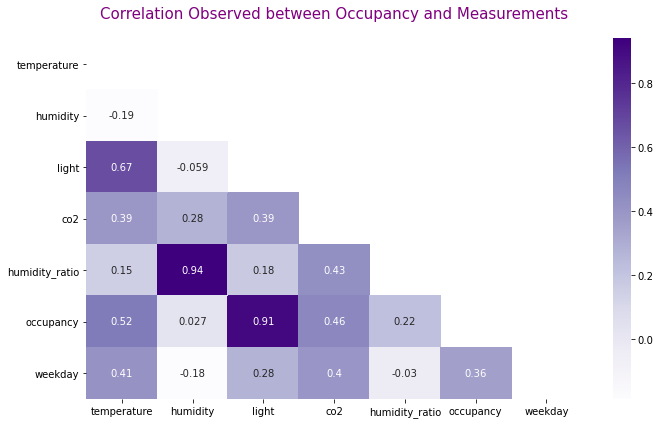

In [193]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,6))
sns.heatmap(corr, mask=mask, annot=True, cmap='Purples')
plt.title('Correlation Observed between Occupancy and Measurements', fontsize=15, pad=20, color='purple')
plt.tight_layout()
plt.savefig('../images/fig20.jpg', dpi=200)
plt.show()